In [26]:
# Since surprise didn't work on local device, I got it through google colab. For this particular project, you need to install scikit-surprise and numpy==1.26.4 .

In [2]:
!pip install scikit-surprise

In [3]:
# 29. Movie Rating prediction using Collaborative Filtering
# Dataset url: https://grouplens.org/datasets/movielens/

In [5]:
!pip install numpy==1.26.4

In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import cross_validate, train_test_split

In [13]:
# Step 1: Load Dataset
# Load MovieLens dataset
df = pd.read_csv('/content/sample_data/ratings.csv')

In [14]:
# Delete the timestamp column, as it is irrelevant
df.drop('timestamp', axis=1, inplace=True)

In [15]:
# Display the first few rows
print('\nDataset Preview:\n')
print(df.head())


Dataset Preview:

   userId  movieId  rating
0       1        1     4.0
1       1        3     4.0
2       1        6     4.0
3       1       47     5.0
4       1       50     5.0


In [17]:
# Step 2: Preprocessing the dataset

# Define a Reader object for Surprise
reader = Reader(rating_scale=(1, 5))

# Making dataframe compatible with Surprise
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

In [20]:
# Step 3: Split the dataset into train and test set
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [21]:
# Step 4: Build Collaborative Filtering Model using SVD
model = SVD()

model.fit(trainset)

In [23]:
# Step 5: Evaluate the model
predictions = model.test(testset)

rmse = accuracy.rmse(predictions)

print(f'RMSE: {rmse:.4f}')

RMSE: 0.8794
RMSE: 0.8794


In [24]:
# Step 6: Make a prediction for a specific user and Movie
user_id = 196
movie_id = 242

predicted_rating = model.predict(user_id, movie_id).est

print(f'Predicted Rating for User {user_id} on Movie {movie_id}: {predicted_rating:.2f}')

Predicted Rating for User 196 on Movie 242: 3.54


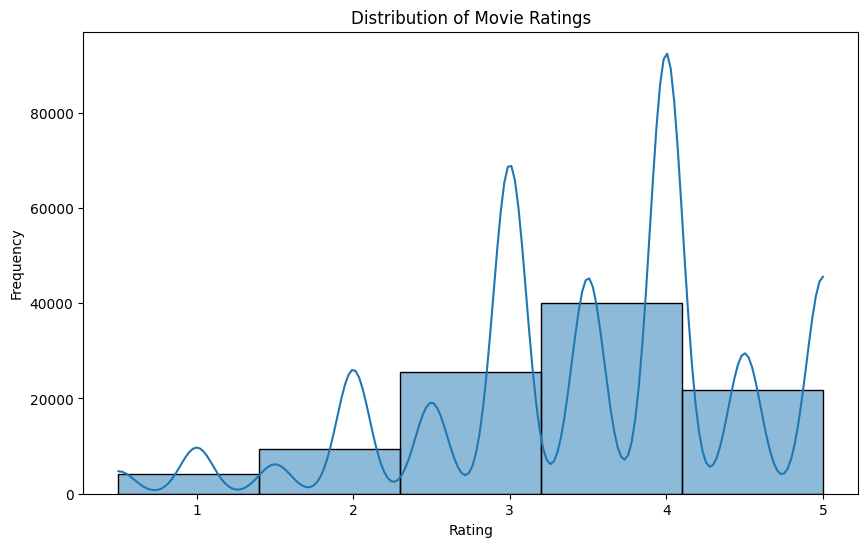

In [25]:
# Step 7: Visualize Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=5, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()